In [1]:
# Imports
from Functions import *
%matplotlib inline


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
df = pd.read_csv('preprocessed_clean_train_set.csv')

In [4]:
df.head()

,keyword,location,text,target,total_words,char_count,sentence_count,avg_word_length,avg_sentence_lenght,tokenized_text,clean_text,clean_total_words,clean_char_count,clean_sentence_count,clean_avg_word_length,clean_avg_sentence_lenght
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,57,1,4.384615,13.0,"['Our', 'Deeds', 'are', 'the', 'Reason', 'of',...",reason allah forgive,3,18,1,6.00,3.0
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,32,2,4.571429,3.5,"['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas...",forest fire near la range canada,6,27,1,4.50,6.0
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,112,2,5.090909,11.0,"['All', 'residents', 'asked', 'to', ""'"", 'shel...",resident ask shelter place officer evacuation ...,10,63,1,6.30,10.0
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,57,1,6.333333,9.0,"['13,000', 'people', 'receive', '#wildfires', ...",people evacuation order california,4,31,1,7.75,4.0
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,72,1,4.235294,17.0,"['Just', 'got', 'sent', 'this', 'photo', 'from...",get send photo smoke school,5,23,1,4.60,5.0


In [5]:
df = df.dropna(subset=['clean_text'])

In [6]:
X = df['clean_text']
y = df['target']

In [7]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=.2, random_state=40521)

In [8]:
tfdf = CountVectorizer()
tf_vect = tfdf.fit_transform(X_train)

In [9]:
X_train

5487                                       want rainstorm
185                                 ems ems petition hour
7478    pic old pkg suicide bomber detonate bomb turke...
816                                                 right
2439    train derailment freakiest freak accidents ind...
                              ...                        
3530             image famine hope blog happen forget god
51                              santa cruz head st police
3433                         tie explosion help drown tie
4443                         hurricane live tracking loop
6432                      suicide america survive patrick
Name: clean_text, Length: 5968, dtype: object

In [10]:
X_test

1725    collision east hwy single vehicle leave lane r...
5048         nuclear power reactor energy japan fuel pool
4079      calgary review policy leave hundred strand hail
4752                               mass murder whale stop
3205    ave abuse motorcycle involve accident fully en...
                              ...                        
1709                san head coach dan room guard collide
5245                                             sea soon
2398                 leave daily let train derail service
2694    richmond coach devastate hear death second dri...
5029      care life land sea air nuclear disaster problem
Name: clean_text, Length: 1492, dtype: object

In [11]:
X_train_r = pd.DataFrame(tfdf.transform(X_train).todense(),columns=tfdf.get_feature_names())
X_test_r = pd.DataFrame(tfdf.transform(X_test).todense(),columns=tfdf.get_feature_names())
y_train_r = y_train.copy()
y_test_r = y_test.copy()

In [12]:
# Import Data Here:

# Model 1 - Logistic Regression

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3413
           1       0.92      0.83      0.87      2555

    accuracy                           0.89      5968
   macro avg       0.90      0.89      0.89      5968
weighted avg       0.90      0.89      0.89      5968

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       866
           1       0.77      0.69      0.72       626

    accuracy                           0.78      1492
   macro avg       0.78      0.77      0.77      1492
weighted avg       0.78      0.78      0.78      1492

********************************************************



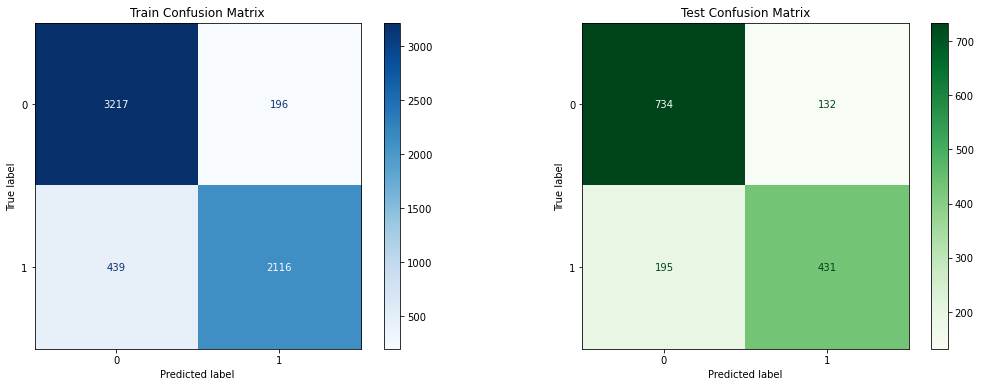

In [13]:
log_pipe = Pipeline([#('ss', StandardScaler()),
                     ('log', LogisticRegression(random_state=40521))])
log_grid = [{'log__C': [0,10],
             'log__solver': ['newton-cg','sag','saga','lbfgs','liblinear']}]
log_gridsearch = GridSearchCV(estimator=log_pipe,
                              param_grid=log_grid,
                              scoring='f1_weighted',
                              cv=5)
gslog_model = run_class_model(log_gridsearch, X_train_r, y_train_r, X_test_r, y_test_r)

In [14]:
gslog_model.best_params_

{'log__C': 10, 'log__solver': 'saga'}

In [15]:
f1_score(y_test_r, gslog_model.predict(X_test_r), pos_label=1,average='weighted')

0.7788708296180576

# Model 2 - K Nearest Neighbors

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3413
           1       1.00      0.96      0.98      2555

    accuracy                           0.98      5968
   macro avg       0.99      0.98      0.98      5968
weighted avg       0.98      0.98      0.98      5968

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       866
           1       0.80      0.46      0.59       626

    accuracy                           0.73      1492
   macro avg       0.75      0.69      0.69      1492
weighted avg       0.74      0.73      0.71      1492

********************************************************



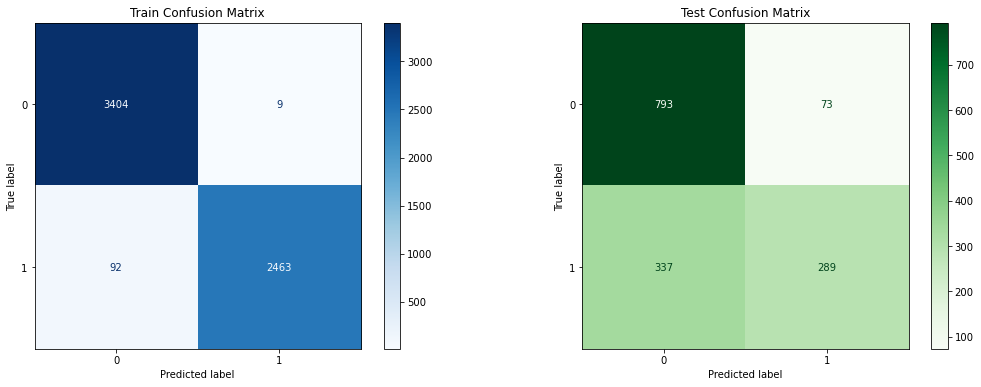

In [16]:

knn_pipe = Pipeline([#('rb', RobustScaler()),
                     ('knn', KNeighborsClassifier())])
knn_grid = [{'knn__n_neighbors': [3,5],
             'knn__weights' : ['uniform', 'distance'],
             'knn__leaf_size': [40,50]           
            }]

knn_gridsearch = GridSearchCV(estimator=knn_pipe,
                              param_grid=knn_grid,
                              scoring='f1_weighted',
                              cv=5)

gsknn_model = run_class_model(knn_gridsearch, X_train_r, y_train_r, X_test_r, y_test_r)

In [17]:
gsknn_model.best_params_

{'knn__leaf_size': 40, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [18]:
f1_score(y_test_r, gsknn_model.predict(X_test_r), pos_label=1,average='weighted')

0.7066601209930905

# Model 3 - Gaussian Naive Bayes

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      3413
           1       0.68      0.88      0.77      2555

    accuracy                           0.77      5968
   macro avg       0.78      0.78      0.77      5968
weighted avg       0.80      0.77      0.77      5968

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       866
           1       0.59      0.76      0.67       626

    accuracy                           0.68      1492
   macro avg       0.69      0.69      0.68      1492
weighted avg       0.70      0.68      0.68      1492

********************************************************



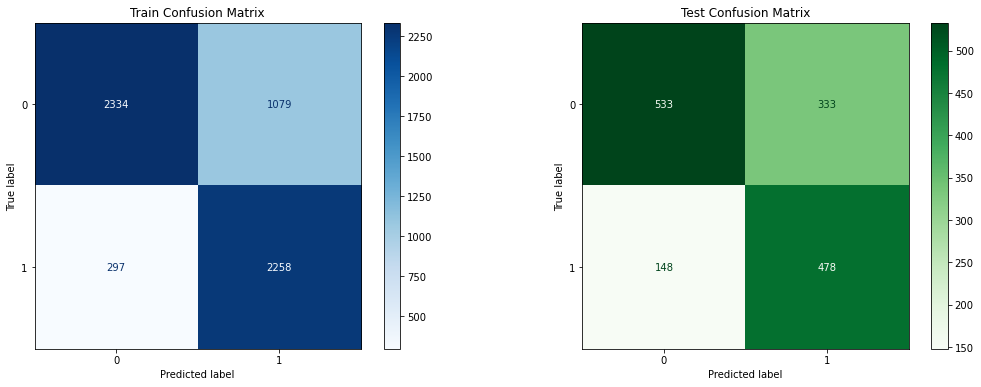

In [19]:
gnb_pipe = Pipeline([#('ss', StandardScaler()),
                     ('gnb', GaussianNB())])
gnb_model = run_class_model(gnb_pipe, X_train_r, y_train_r, X_test_r, y_test_r)

In [20]:
f1_score(y_test_r, gnb_model.predict(X_test_r), pos_label=1,average='weighted')

0.6790895238358626

# Model 4 - Random Forest Classifier

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      3413
           1       0.97      0.26      0.41      2555

    accuracy                           0.68      5968
   macro avg       0.81      0.63      0.60      5968
weighted avg       0.78      0.68      0.62      5968

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       866
           1       0.93      0.24      0.39       626

    accuracy                           0.68      1492
   macro avg       0.79      0.62      0.58      1492
weighted avg       0.77      0.68      0.61      1492

********************************************************



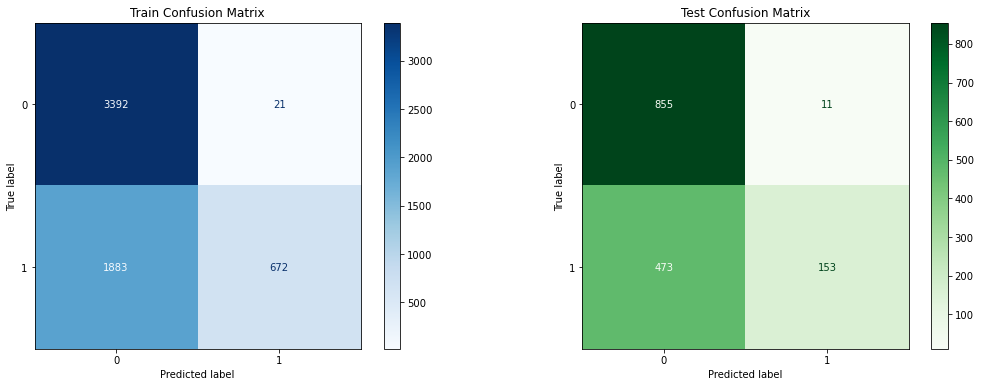

In [21]:
rf_pipe = Pipeline([('rb', RobustScaler()),
                    ('RF', RandomForestClassifier(random_state=40521))])
rf_grid = [{'RF__max_depth': [2,11],
            'RF__min_samples_split': [3,7],
            'RF__min_samples_leaf': [3,7],
            'RF__oob_score': [True,False],
           }]
gs_rf = GridSearchCV(estimator = rf_pipe,
                     param_grid = rf_grid,
                     scoring = 'f1_weighted',
                     cv = 3)
gsrf_model = run_class_model(gs_rf, X_train_r, y_train_r, X_test_r, y_test_r)

In [22]:
gsrf_model.best_params_

{'RF__max_depth': 11,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 3,
 'RF__oob_score': True}

In [23]:
f1_score(y_test_r,gsrf_model.predict(X_test_r), pos_label=1, average='weighted')

0.6149027670246763

# Model 5 - ADA Boost

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.78      0.87      0.83      3413
           1       0.80      0.68      0.73      2555

    accuracy                           0.79      5968
   macro avg       0.79      0.77      0.78      5968
weighted avg       0.79      0.79      0.79      5968

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       866
           1       0.76      0.62      0.68       626

    accuracy                           0.76      1492
   macro avg       0.76      0.74      0.75      1492
weighted avg       0.76      0.76      0.75      1492

********************************************************



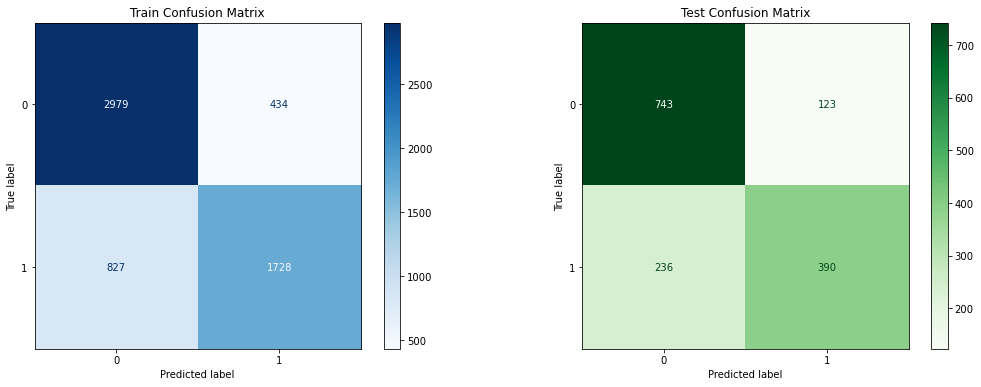

In [24]:
ada_pipe = Pipeline([('rb', RobustScaler()),
                    ('ada', AdaBoostClassifier(random_state=40521))])
ada_grid = [{'ada__learning_rate': [1.5,1.0],
             'ada__n_estimators': [100,50]
           }]
gs_ada = GridSearchCV(estimator = ada_pipe,
                     param_grid = ada_grid,
                     scoring = 'f1_weighted',
                     cv = 3)

gsada_model = run_class_model(gs_ada, X_train_r, y_train_r, X_test_r, y_test_r)

In [25]:
gsada_model.best_params_

{'ada__learning_rate': 1.0, 'ada__n_estimators': 100}

In [26]:
f1_score(y_test_r,gsada_model.predict(X_test_r), pos_label=1, average='weighted')

0.7548160870513415

# Model 6 - Gradient Boost

********************************************************

     Classification Report: Train

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3413
           1       0.84      0.77      0.80      2555

    accuracy                           0.84      5968
   macro avg       0.84      0.83      0.83      5968
weighted avg       0.84      0.84      0.84      5968

********************************************************

     Classification Report: Test

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       866
           1       0.72      0.66      0.69       626

    accuracy                           0.75      1492
   macro avg       0.74      0.73      0.74      1492
weighted avg       0.74      0.75      0.74      1492

********************************************************



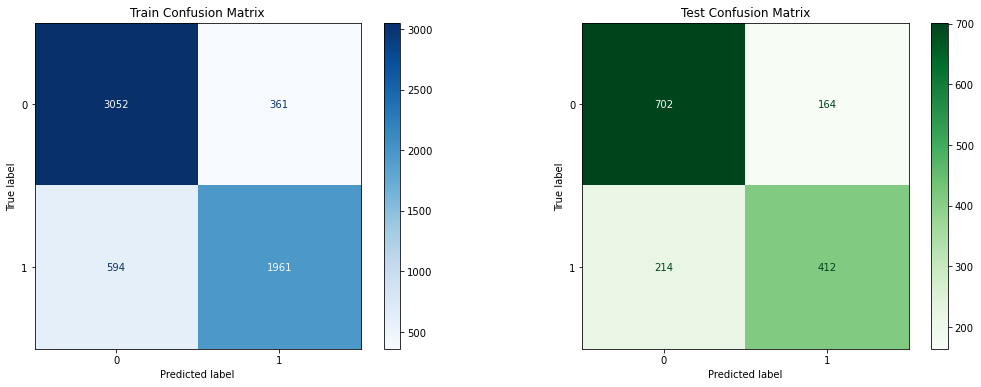

In [27]:
gra_pipe = Pipeline([('rb', RobustScaler()),
                    ('gra', GradientBoostingClassifier(random_state=40521,subsample=.65))])
gra_grid = [{'gra__learning_rate': [1.5,1.0],
             'gra__n_estimators': [150,100,50]
           }]
gs_gra = GridSearchCV(estimator = gra_pipe,
                     param_grid = gra_grid,
                     scoring = 'f1_weighted',
                     cv = 3)

gsgra_model = run_class_model(gs_gra, X_train_r, y_train_r, X_test_r, y_test_r)

In [28]:
gsgra_model.best_params_

{'gra__learning_rate': 1.0, 'gra__n_estimators': 100}

In [29]:
f1_score(y_test_r,gsgra_model.predict(X_test_r), pos_label=1, average='weighted')

0.7449337355659704

# Model 7 - XG Boost

[19:53:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[19:55:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[19:56:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[19:57:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[19:59:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:00:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:02:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:03:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:05:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:06:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:08:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[20:09:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

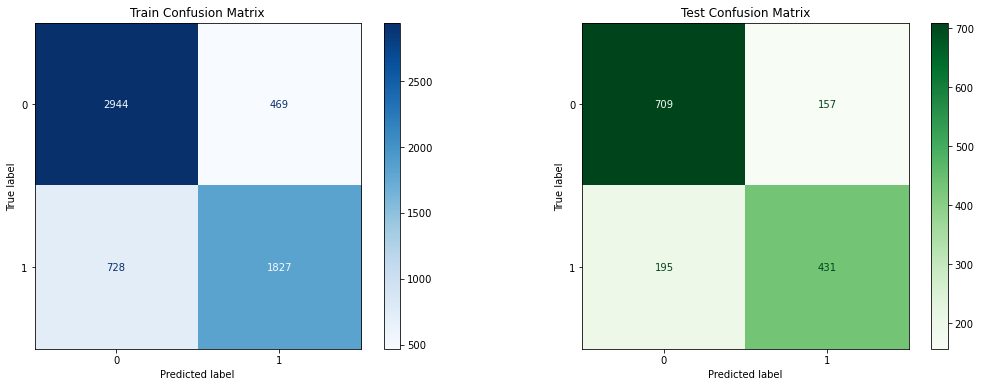

In [30]:
test_xg_pipe = Pipeline([#('rb', RobustScaler()),
                    ('xg', xgb.XGBClassifier(random_state=40521,
                                             min_child_weight=3,subsample=.65))])

test_xg_grid = [{'xg__learning_rate': [2,1.5,1.0],
                 'xg__n_estimators': [150,100,50],
                 'xg__gamma': [.5,1,2],
                 'xg__max_depth': [1,2],
                 'xg__colsample_bytree': [.6,.7],
                }]

gs_xg_test = GridSearchCV(estimator = test_xg_pipe,
                     param_grid = test_xg_grid,
                     scoring = 'f1_weighted',
                     cv = 3)

gsxg_model = run_class_model(gs_xg_test, X_train_r, y_train_r, X_test_r, y_test_r)

In [31]:
gsxg_model.best_params_

{'xg__colsample_bytree': 0.6,
 'xg__gamma': 1,
 'xg__learning_rate': 1.0,
 'xg__max_depth': 2,
 'xg__n_estimators': 150}

In [32]:
f1_score(y_test_r,gsxg_model.predict(X_test_r), pos_label=1,average='weighted')

0.7629151944490129

# Model 8 - Support Vector Machines

In [ ]:
svm_pipe = Pipeline([#('mms',MinMaxScaler(feature_range=(-1,1))),
                     #('ss', StandardScaler()),
                     ('svm', SVC(random_state=40521))])
svm_grid = [{'svm__C': [1.5,1.0,.5],
             'svm__gamma': ['scale','auto'],
             'svm__kernel': ['linear','poly','rbf','sigmoid'],
           }]

gs_svm = GridSearchCV(estimator = svm_pipe,
                     param_grid = svm_grid,
                     scoring = 'f1_weighted',
                     cv = 3)
gssvm_model = run_class_model(gs_svm, X_train_r, y_train_r, X_test_r, y_test_r)

In [ ]:
gssvm_model.best_params_

In [ ]:
f1_score(y_test_r,gssvm_model.predict(X_test_r), pos_label=1,average='weighted')

# Table of Classification Results

In [ ]:
all_models = [gslog_model,gsknn_model,gnb_model,gsrf_model,
              gsada_model,gsgra_model,gsxg_model,gssvm_model]
model_names = ['Logistic Regression',
               'K Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Random Forest',
               'ADA Boost',
               'Gradient Boost',
               'XG Boost',
               'Support Vector Machines'
              ]

model_table = pd.DataFrame({"Models": model_names})
model_table['F1 Score'] = [round(f1_score(y_test_r,all_models[m].predict(X_test_r),
                                          pos_label='CONFIRMED', average='weighted'),4) 
                                           for m in range(len(all_models))]
model_table['Accuracy'] = [round(accuracy_score(y_test_r,all_models[m].predict(X_test_r)),4)
                           for m in range(len(all_models))]
model_table['Precision'] = [round(precision_score(y_test_r,all_models[m].predict(X_test_r),
                                                  pos_label='CONFIRMED'),4) 
                                                    for m in range(len(all_models))]
model_table['Recall'] = [round(recall_score(y_test_r,all_models[m].predict(X_test_r),
                                            pos_label='CONFIRMED'),4) 
                                             for m in range(len(all_models))]
model_table.sort_values(by="F1 Score")

# Best Model